## Rotational Broadening

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import RotationalBroadening

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# load PHOENIX model (R~1e6)
wave, flux = np.loadtxt('data/models_Teff_4300_logg_4.0_Z_+0.0.txt').T # T=4300K, logg=4.0, solar metallicity
# select wavelength region in nm
wave_range = (2320.0, 2390.0)
mask = (wave >= wave_range[0]) & (wave <= wave_range[1])
assert np.any(mask), 'No data in the selected wavelength range'
wave = wave[mask]
flux = flux[mask]

In [35]:
# pyasl fastRotBroad
import PyAstronomy.pyasl as pyasl

vsini = 10.0 # km/s
eps = 0.5 # limb darkening coefficient
flux_pyasl = pyasl.fastRotBroad(wave, flux, epsilon=eps, vsini=vsini)

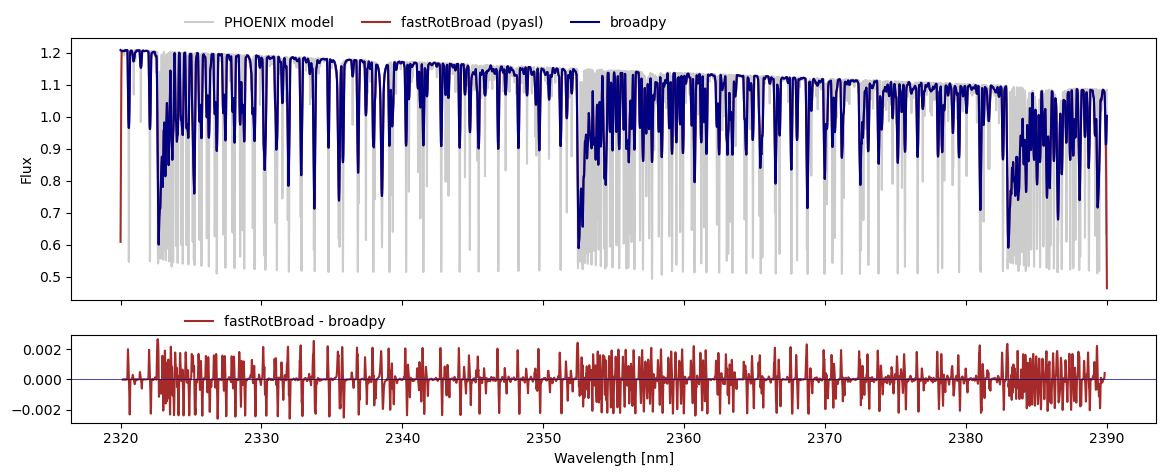

In [36]:
RB = RotationalBroadening(wave, flux)
flux_rotbroad = RB(vsini=vsini, epsilon=eps)
# plot the original spectrum
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(wave, flux, label='PHOENIX model', alpha=0.2, color='black')

ax[0].plot(wave, flux_pyasl, label='fastRotBroad (pyasl)', color='brown')

ax[0].plot(wave, flux_rotbroad, label='broadpy', color='navy')

residuals = flux_pyasl - flux_rotbroad

c = 299792.458 # km/s
n_edge = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / (c/vsini))
residuals[:n_edge] = residuals[-n_edge:] = np.nan

ax[1].plot(wave, residuals, color='brown', label='fastRotBroad - broadpy')
ax[1].axhline(0, color='navy', linestyle='-', lw=0.5)
ax[1].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Flux')
[ax_.legend(ncol=3, loc=(0.1, 1.01), frameon=False) for ax_ in ax]
plt.show()

In [37]:
# speed comparison
speed_test = True

if speed_test:
    %timeit pyasl.fastRotBroad(wave, flux, epsilon=eps, vsini=vsini)
    %timeit RB(vsini=vsini, epsilon=eps)

4.93 ms ± 67.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.25 ms ± 27.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
